<h1>A nulladik kvantumszámítógépes programom Qiskittel - Megoldás</h1>

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $

<h4>1a. feladat</h4>
Készíts egy 1 kvantumbitet és 1 klasszikus bitet tartalmazó áramkört! A kvantumbiten hass az állapotra kettő X kapuval egymás után!

Mit vársz, mi lesz a bit állapota?

Futtasd le az áramkört 1024 alkalommal, írd ki a futtatás eredményét, és ábrázold hisztogrammon! Az eredmény megegyezik az általad várttal?

<b>Mivel az X kapu egy $\pi$-vel való forgatás a Bloch-gömbön az $x$ tengely körül, ha ezt kétszer ismételjük, az állapot a kiindulási, vagyis a $\ket{0}$ állapot lesz.</b>

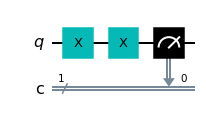

{'0': 1024}


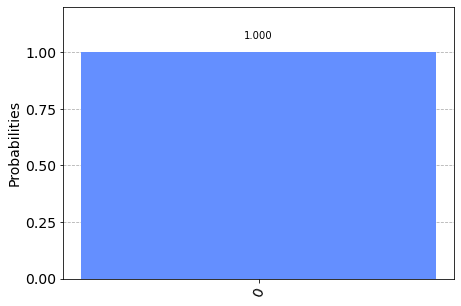

In [17]:
# importálja a szükséges könyvtárakat
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(1, 1) # Létrehozza az áramkört 1 kvantum és 1 klasszikus bittel

qc.x(0) # Hat egy X kapuval a 0. kvantumbiten
qc.x(0) # Mégegyszer hat egy X kapuval a 0. kvantumbiten

qc.measure(0, 0) # Hozzáad egy mérést a 0. kvantumbitet megméri, az eredményét eltárolja a 0. klasszikus bitben

display(qc.draw(output="mpl")) #Kirajzolja a mérés eredményét, a display() olyan mint a print() függvény, csak ez ábrákat is ki tud rajzolni

job = execute(qc, Aer.get_backend("aer_simulator")) # Létrehozza a folyamatot
counts = job.result().get_counts(qc) # Kinyeri a mérés eredményét
print(counts) # Kiírja a mérés eredményét
plot_histogram(counts) # Ábrázolja hosztogramon a mérés eredményét

<h4>1b. feladat</h4>
Készíts egy 1 kvantumbitet és 1 klasszikus bitet tartalmazó áramkört! A kvantumbiten hass az állapotra $k$ X kapuval egymás után! ($k$ értéke legyen változtatható, $k\in\mathbb{N}$)

Mit vársz, mi lesz a bit állapota az egyes esetekben? Keress mintázatot!

Futtasd le az áramkört 1024 alkalommal, írd ki a futtatás eredményét, és ábrázold hisztogrammon! Az eredmény megegyezik az általad várttal?

Ismételd meg a kísérletet több különböző $k$ esetén!

<b>Páros $k$ esetén mindig 0, páratlan $k$ esetén mindig az 1 állapotba jutunk.</b>

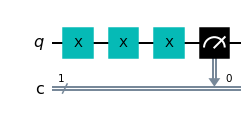

{'1': 1024}


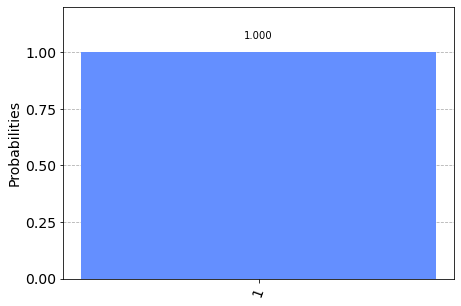

In [18]:
# importálja a szükséges könyvtárakat
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

k = 3

qc = QuantumCircuit(1, 1) # Létrehozza az áramkört 1 kvantum és 1 klasszikus bittel

for i in range(k):
    qc.x(0) # Hat egy X kapuval a 0. kvantumbiten

qc.measure(0, 0) # Hozzáad egy mérést a 0. kvantumbitet megméri, az eredményét eltárolja a 0. klasszikus bitben

display(qc.draw(output="mpl")) #Kirajzolja a mérés eredményét, a display() olyan mint a print() függvény, csak ez ábrákat is ki tud rajzolni

job = execute(qc, Aer.get_backend("aer_simulator")) # Létrehozza a folyamatot
counts = job.result().get_counts(qc) # Kinyeri a mérés eredményét
print(counts) # Kiírja a mérés eredményét
plot_histogram(counts) # Ábrázolja hosztogramon a mérés eredményét

<h4>1+. feladat (haladó)</h4>
Mennyi az $XX$, $XXX$, $XX...X$ szorzatok eredménye?

Emlékeztető:

$$ X = \begin{pmatrix} 0& 1 \\ 1& 0 \end{pmatrix}. $$

A feladatot megoldhatod papiron, vagy a notebookban python segítségével is.

*Rávezetés: a matematikai számítások elvégzéséhez (pl. mátrixszorzáshoz) gyakran a numpy könyvtár függvényeit használjuk*

<b>$X^n=X$, ha $n$ páratlan. $X^n=\mathbb{1}$, ha $n$ páros.</b>

In [19]:
import numpy as np
X_gate = np.array([[0, 1], [1, 0]]) # Létrehozza az X kaput numpy array-ként
gate = X_gate

for i in range(4): # Eddig írja ki az eredményeket
    gate = X_gate.dot(gate) # A numpy dot() függvényével számolja ki a mátrixszorzatokat
    print("X"*(i+2)+" = ") # Kiírja a megfelelő számú "X"-et
    print(gate) # Kirja a mátrixszorzás eredményét
    print() # Kiír egy üres sort

XX = 
[[1 0]
 [0 1]]

XXX = 
[[0 1]
 [1 0]]

XXXX = 
[[1 0]
 [0 1]]

XXXXX = 
[[0 1]
 [1 0]]



<h4>1++. feladat (haladó)</h4>
Készíts egy diagramot az előző kísérlet eredménye alapján! Az $x$ tengelyen a $k$ értéke legyen, az $y$ tengelyen a mérések eredménye. (Ne felejtsd el, hogy a diagramnak legyen címe, tengelyjelzet, jelmagyarázat, tengelybeosztás, mértékegység (ha van))

*Segítség: a diagramokat általában a matplotlib.pyplot könyvtár segítségével készítjük.*

Text(0.5, 1.0, 'A mérés eredménye a $k$ függvényében.')

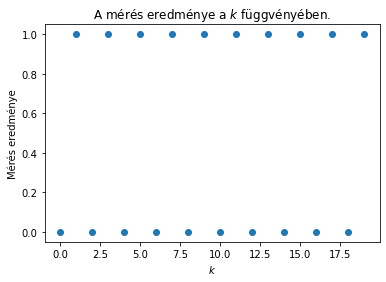

In [20]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(range(20))
y = np.array([0 if l%2==0 else 1 for l in x])

plt.plot(x, y, "o")
plt.xlabel("$k$")
plt.ylabel("Mérés eredménye")
plt.title("A mérés eredménye a $k$ függvényében.")

<h4>2a. feladat</h4>
Készíts egy 4 kvantumbites áramkört! Az 1. biten hass egy X kapuval, a 2. biten 2-vel... a 4. biten 4 X kapuval.

Mit vársz, mi lesz a mérés eredménye? Futtasd le az áremkört 1024 alkalommal! Megegyezik a mérés eredménye az általad várttal?

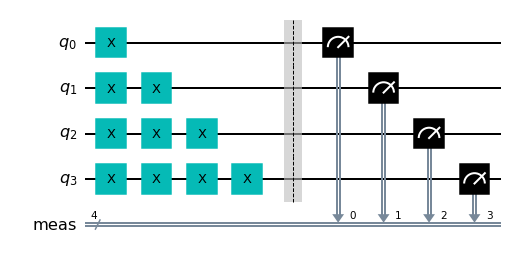

{'0101': 1024}


In [21]:
# importálja a szükséges könyvtárakat
from qiskit import QuantumCircuit, Aer, execute

qc = QuantumCircuit(4) # Létrehozza az áramkört 4 kvantum bittel

for i in range(4): # Végigmegy a 4 qbiten
    for j in range(i+1): # A megfelelő számú X kapinyi alkalommal lefut
        qc.x(i) # Hozzáadja az X kaput
        
qc.measure_all() # Hozzáadja a méréseket

display(qc.draw(output="mpl")) # Kirajzolja az áramkört

job = execute(qc, Aer.get_backend("aer_simulator")) # Létrehozza a folyamatot
counts = job.result().get_counts(qc) # Kinyeri a mérés eredményét
print(counts) # Kiírja a mérés eredményét

<h4>2b. feladat</h4>

Készíts egy 4 kvantumbites áramkört! Minden bit esetén dobj fel egy érmét (virtuálisan), ha az eredmény fej, hass a biten egy X kapuval, ha az eredmény írás, ne hass semmivel az adott biten! Rajzold ki az áramkört, gondold végig, hogy mi lesz a mérés eredménye (Figyelj, hogy a Qiskit lentről fölfelé számozza a kvantumbiteket!)!

Futtasd az áramkört 1024 alkalommal, írd ki a mérési eredmények gyakoriságát! Az a mérés eredménye amit vártál?

Ismételd meg a futtatást többször!

*Segítség: a véletlenszámgenráláshoz például a random.randint() vagy a numpy.random.rand() függvényeket használhatjuk*

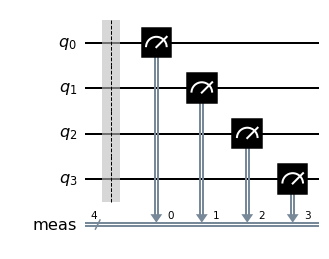

{'0000': 1024}


In [22]:
# importálja a szükséges könyvtárakat
from qiskit import QuantumCircuit, Aer, execute

qc = QuantumCircuit(4) # Létrehozza az áramkört 4 kvantum bittel

for i in range(4):
    if np.random.rand() > 0.5:
        qc.x(i)

qc.measure_all() # Hozzáad egy mérést a 0. kvantumbitet megméri, az eredményét eltárolja a 0. klasszikus bitben

display(qc.draw(output="mpl")) #Kirajzolja a mérés eredményét

job = execute(qc, Aer.get_backend("aer_simulator")) # Létrehozza a folyamatot
counts = job.result().get_counts(qc) # Kinyeri a mérés eredményét
print(counts) # Kiírja a mérés eredményét

<h4>3a. feladat</h4>

Hozz létre egy 1 kvantumbites áramkört! Hass a qbiten $n$ Hadamard kapuval!

Mit gondolsz mi lesz a mérése végeredménye különböző $n$-ek esetén? Futtasd le az egyes áramköröket 1024 alkalommal különböző kapuszám esetén! A mérés eredménye megegyezik az általad várttal?

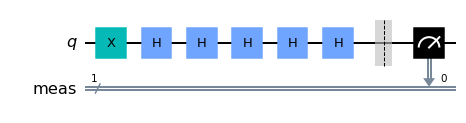

{'1': 506, '0': 518}


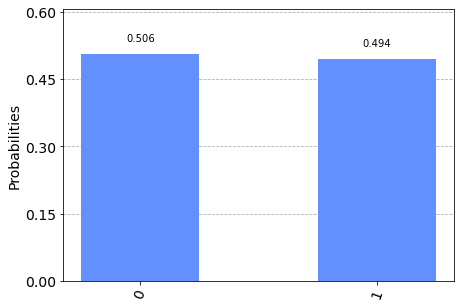

In [23]:
# importálja a szükséges könyvtárakat
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

n = 5
kezdo_allpot = 1 # A kiindulási állapot 0=|0>, 1=|1>

qc = QuantumCircuit(1) # Létrehozza az áramkört

if kezdo_allpot == 1: # Ha az |1> állapotból indul az áramkör
    qc.x(0) # Beállítja az áramkört az |1> állapotba

for i in range(n): # Megismétli n alkalommal
    qc.h(0) # Hozzáad egy H kaput az áramkörhöz

qc.measure_all() # Hozzáad egy mérést a 0. kvantumbitet megméri, az eredményét eltárolja a 0. klasszikus bitben

display(qc.draw(output="mpl")) #Kirajzolja a mérés eredményét

job = execute(qc, Aer.get_backend("aer_simulator")) # Létrehozza a folyamatot
counts = job.result().get_counts(qc) # Kinyeri a mérés eredményét
print(counts) # Kiírja a mérés eredményét
plot_histogram(counts)

<h4>3b. feladat</h4>

Hozz létre egy 2 kvantumbites áramkört! Minden kvantumbiten hass egy Hadamard kapuval!

Mi lesz a mérés végeredménye! Futtasd le az áramkört 1024 alkalommal, az eredményt ábrázold hisztogramon! A mérés eredménye megegyezik az általad várttal?

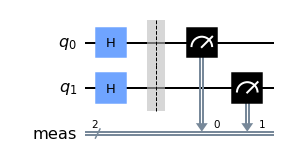

{'01': 255, '11': 267, '10': 247, '00': 255}


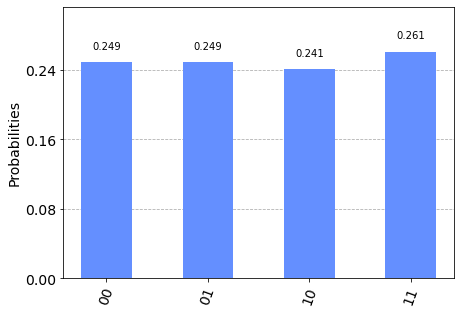

In [24]:
# importálja a szükséges könyvtárakat
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(2)

qc.h(0)
qc.h(1)

qc.measure_all() # Hozzáad egy mérést a 0. kvantumbitet megméri, az eredményét eltárolja a 0. klasszikus bitben

display(qc.draw(output="mpl")) #Kirajzolja a mérés eredményét

job = execute(qc, Aer.get_backend("aer_simulator")) # Létrehozza a folyamatot
counts = job.result().get_counts(qc) # Kinyeri a mérés eredményét
print(counts) # Kiírja a mérés eredményét
plot_histogram(counts)

<h4>3c. feladat</h4>

Általánosítsd az előző feladatot $n$ kvantumbitre! Mi lesz a mérés eredménye? Vizsgáld meg különböző méretek esetén az eredmények változását!

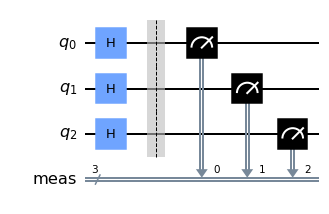

{'010': 127, '001': 118, '101': 128, '111': 129, '011': 121, '000': 123, '110': 134, '100': 144}


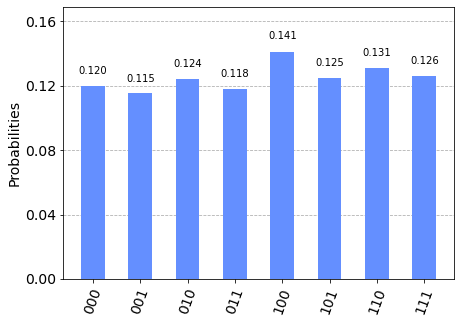

In [25]:
# importálja a szükséges könyvtárakat
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

n = 3

qc = QuantumCircuit(n)

for i in range(n):
    qc.h(i)

qc.measure_all() # Hozzáad egy mérést a 0. kvantumbitet megméri, az eredményét eltárolja a 0. klasszikus bitben

display(qc.draw(output="mpl")) #Kirajzolja a mérés eredményét

job = execute(qc, Aer.get_backend("aer_simulator")) # Létrehozza a folyamatot
counts = job.result().get_counts(qc) # Kinyeri a mérés eredményét
print(counts) # Kiírja a mérés eredményét
plot_histogram(counts)

<h4>3+. feladat (haladó matematika)</h4>

Határozd meg a $HH$ és a $H\otimes H$ mátrixot! Mi a különbség a 2 között? Valósídtsd meg 1-1 kvantumáramkörön mindekettőt!

Határozd meg a $H\otimes H\ket{00}$ vektort!

Emlékeztető:

$$\dfrac{1}{\sqrt{2}}\begin{pmatrix} 1& 1 \\ 1& -1 \end{pmatrix}.$$

A feladatot megoldhatod papiron, vagy a notebookban python segítségével is.

*Rávezetés: a matematikai számítások elvégzéséhez (pl. mátrixszorzáshoz) gyakran a numpy könyvtár függvényeit használjuk*

HH=
[[1. 0.]
 [0. 1.]]


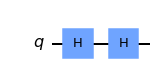


H ⊗ H=
[[ 0.5  0.5  0.5  0.5]
 [ 0.5 -0.5  0.5 -0.5]
 [ 0.5  0.5 -0.5 -0.5]
 [ 0.5 -0.5 -0.5  0.5]]


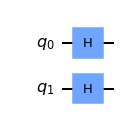


H ⊗ H|00>=
[0.5 0.5 0.5 0.5]


In [26]:
import numpy as np
from qiskit import QuantumCircuit, Aer, execute

x = 1/np.sqrt(2) # A szorzófaktor
H_gate = np.array([[x, x], [x, -x]]) # A Hadamard kapu numpy arrayként
zero_state = np.array([1, 0]) # A |0> állapot numpy arrayként

print("HH=")
print(H_gate.dot(H_gate)) # A mátrixszorzás eredménye (egységmátrix)

qc0 = QuantumCircuit(1) # Az első kvantumáramkör
qc0.h(0) # Az első biten hat egy H kapu
qc0.h(0) # Az első biten hat még egy H kapu
display(qc0.draw(output="mpl")) # Kirajzolja az áramkört

print()

print("H ⊗ H=")
print(np.kron(H_gate, H_gate)) # A tenzorszorzás eredménye

qc1 = QuantumCircuit(2) # A második áramkör
qc1.h(0) # Az első biten hat egy H kapu
qc1.h(1) # A második biten hat egy H kapu
display(qc1.draw(output="mpl")) # Kirajzolja az áramkört

print()
print("H ⊗ H|00>=")
HxH_gate = np.kron(H_gate, H_gate) # Az előző feladatrészben kiszámolt mátrix
zeroXzero_gate = np.kron(zero_state, zero_state) # A |00> mátrix: [1, 0, 0, 0]
print(HxH_gate.dot(zeroXzero_gate)) # Két tenzorszorzat mátrixszorzata

<h4>4. feladat</h4>

Bizonyítsd be a $Z=HXH$ és az $X=HZH$ azonosságot!

Emlékeztető:
$$X = \begin{pmatrix} 0& 1 \\ 1& 0 \end{pmatrix}.$$
$$Z = \begin{pmatrix} 1& 0 \\ 0& -1 \end{pmatrix}.$$
$$H= \dfrac{1}{\sqrt{2}}\begin{pmatrix} 1& 1 \\ 1& -1 \end{pmatrix}.$$

*Segítség: használhatsz mátrixszorzást, vagy készíthetsz kvantumáramköröket és megvizsgálhatod a hatásukat bizonyos kiindulási állapotokon.*

In [27]:
x = 1/np.sqrt(2) # A szorzófaktor
H_gate = np.array([[x, x], [x, -x]]) # A Hadamard kapu numpy arrayként
X_gate = np.array([[0, 1], [1, 0]])
Z_gate = np.array([[1, 0], [0, -1]])

print(H_gate.dot(X_gate).dot(H_gate))

print(H_gate.dot(Z_gate).dot(H_gate))

[[ 1.  0.]
 [ 0. -1.]]
[[0. 1.]
 [1. 0.]]


<h4>5. feladat</h4>

Készíts egy 3 kvantumbites áramkört! Valósítsd meg, hogy az áramkör az 1. és a 3. kvantumbiten egy swap (csere) kapuval hasson (Használj CNOT-kapukat)!

In [28]:
def encode(qc, n, msg):
    """
    A függvény, ami elkódolja az értéket n kvantumbiten
    Paraméter:
        qc: A kvantumáramkör, amire elkódoljuk az üzenetet (QuantumCircuit)
        n: Hány kvantumbiten kódolja el az üzenetet (int)
        msg: Az elkódolandó üzenet, lehet int
    Visszaad:
        qc: A kvantumáramkör az elkódolt üzenettel (QuantumCircuit)
    """
    if type(msg) != int: # Ha az üzenet nem int típusú
        raise ValueError(f"A(z) {msg} nem megfelelő üzenet! - csak egész számot lehet megadni") # Hibát ad
    if msg < 0 or msg >= 2**n: # Ha a szám nincs a megfelelő tartományban
        raise ValueError(f"A(z) {msg} nem megfelelő üzenet! - csak [0; 2^n] intervallumban lehet a szám") # Hibát ad
    msg = format(msg, f'0{n}b') # Bináris számmá konvertálja
    print("Eredeti üzenet:", msg) # Kiírja az üzenetet
            
    for i in range(n):
        if msg[i] == "1": # Ha az üzenet i. karaktere "1"
            qc.x(i) # Flippeli az i. bitet
    return qc # Visszaadja a kvantumáramkört

Eredeti üzenet: 001


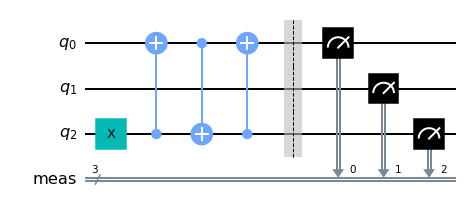

In [29]:
# importálja a szükséges könyvtárakat
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(3)

qc = encode(qc, 3, 1)

qc.cx(2, 0)
qc.cx(0, 2)
qc.cx(2, 0)

qc.measure_all()

qc.draw(output="mpl")

In [30]:
job = execute(qc, Aer.get_backend("aer_simulator"))
counts = job.result().get_counts(qc)
print(counts)
print("A megfordított üzenet", list(counts.keys())[0][::-1])

{'001': 1024}
A megfordított üzenet 100


<h4>5+. feladat</h4>

Általánosítds az előző feladat megoldását $n$ kvantumbitre! Hozz létre egy $n$ kvantumbites áramkört, majd az áramkör hajtson végre úgy cseréket, hogy az eredetileg elkódolt üzenet megfordúljon (pl.: 0001 -> 1000)

Eredeti üzenet: 00001


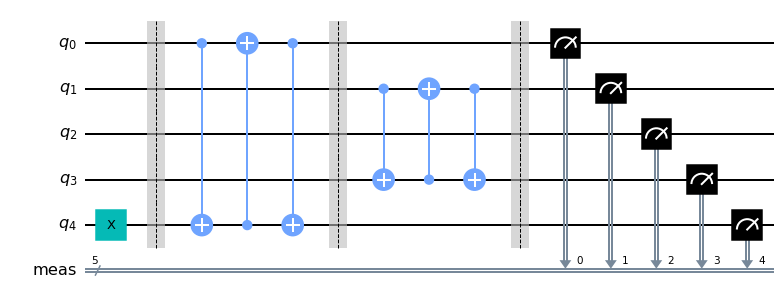

{'00001': 1024}
A megfordított üzenet 10000


In [31]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

n = 5

qc = QuantumCircuit(n)

qc = encode(qc, n, 1)

def add_swap(a, b):
    qc.barrier()
    qc.cx(a, b)
    qc.cx(b, a)
    qc.cx(a, b)

for i in range(n//2):
    add_swap(i, n-i-1)
qc.measure_all()
display(qc.draw(output="mpl"))

job = execute(qc, Aer.get_backend("aer_simulator"))
counts = job.result().get_counts(qc)
print(counts)
print("A megfordított üzenet", list(counts.keys())[0][::-1])

<h4>6. feladat</h4>

<i>A 2b. feladat alapján.</i>

Készíts egy 4 kvantumbites áramkört! Minden bit esetén dobj fel egy érmét (kvantumosan*), ha az eredmény fej, hass a biten egy X kapuval, ha az eredmény írás, ne hass semmivel az adott biten! Rajzold ki az áramkört!
Futtasd az áramkört 1024 alkalommal, írd ki a mérési eredmények gyakoriságát!

*A kvantumos érmefeldobás azt jelenti, hogy a dobás eredményét egy második kvantumáramkör mérése alapján határozza meg. (Például egy 4 kvantumbites áramkör, ahol minden biten egy H kapuval hatottál, 1 mérés (shot) után lesz 4 véletlen számod, az alapján hass az eredeti áramkörön.)

Ismételd meg a futtatást többször!

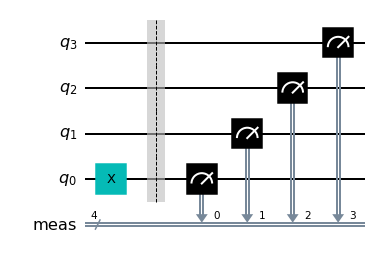

{'0001': 1024}


In [32]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

def get_coin_flip(N=4):
    coin_circuit = QuantumCircuit(N)
    for i in range(N):
        coin_circuit.h(i)
    
    coin_circuit.measure_all()
    job = execute(coin_circuit, Aer.get_backend("aer_simulator"), shots=1)
    return list(job.result().get_counts(coin_circuit).keys())[0]

qc = QuantumCircuit(4)
state = get_coin_flip()

for i in range(len(state)):
    if state[i] == "1":
        qc.x(i)

qc.measure_all() # Hozzáad egy mérést a 0. kvantumbitet megméri, az eredményét eltárolja a 0. klasszikus bitben

display(qc.draw(output="mpl", reverse_bits=True)) #Kirajzolja a mérés eredményét

job = execute(qc, Aer.get_backend("aer_simulator")) # Létrehozza a folyamatot
counts = job.result().get_counts(qc) # Kinyeri a mérés eredményét
print(counts) # Kiírja a mérés eredményét